# Diagrams

## Introducción

El modelado visual es una parte fundamental en el desarrollo de software y en la administración de infraestructura. Los diagramas ayudan a los equipos a comprender y comunicar la arquitectura, los flujos de datos y las relaciones de manera efectiva. Sin embargo, crear y mantener diagramas puede ser un proceso laborioso y propenso a errores.

**Diagrams** es una biblioteca de Python que aborda este problema permitiéndote crear diagramas como código. Con Diagrams, puedes definir tu infraestructura o arquitectura en Python, lo que facilita la automatización, la documentación y la colaboración. En este artículo, exploraremos cómo utilizar Diagrams para crear diagramas eficientes y cómo puedes integrarlo en tus proyectos.

## Instalación de Diagrams

Antes de comenzar, necesitamos instalar Diagrams. Puedes instalar Diagrams utilizando `pip`, el administrador de paquetes de Python.

```bash
pip install diagrams
```

Además, necesitaremos Graphviz, una herramienta para generar los diagramas. Puedes descargar Graphviz desde [su sitio web oficial](https://www.graphviz.org/download/) e instalarlo en tu sistema.

## Creando Diagramas con Diagrams

Diagrams ofrece una forma intuitiva de crear diagramas como código en Python. Comencemos con un ejemplo básico:

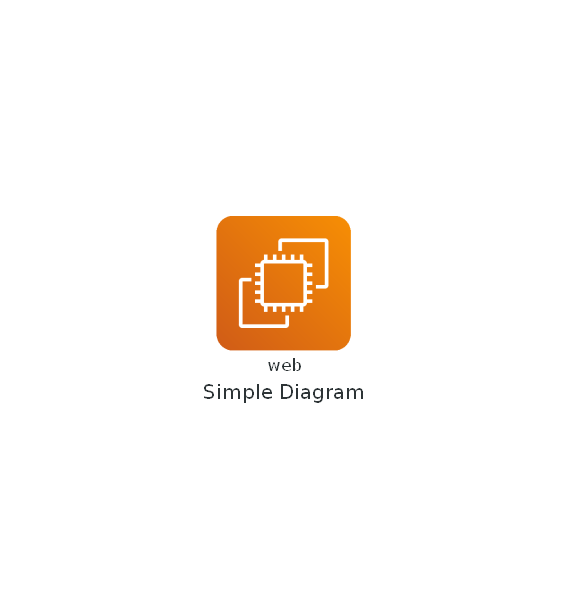

In [1]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram", show=False) as diagram:
    EC2("web")
diagram


1. Importa las bibliotecas necesarias:
   - `from diagrams import Diagram`: Importa la clase `Diagram` que se utiliza para crear el diagrama.
   - `from diagrams.aws.compute import EC2`: Importa el componente EC2 de la biblioteca "diagrams" que representa una instancia de Amazon EC2.

2. Crea un nuevo diagrama con el nombre "Diagrama Simple" utilizando la clase `Diagram`. El parámetro `show=False` se utiliza para indicar que el diagrama no se debe mostrar automáticamente cuando se crea.

3. Dentro del bloque `with`, se define un componente EC2 llamado "web" utilizando la clase `EC2`. Este componente representa una instancia de servidor virtual en la nube de Amazon Web Services (AWS) y se etiqueta como "web".

4. El diagrama se cierra automáticamente al finalizar el bloque `with`.

5. Finalmente, el diagrama se muestra utilizando la variable `diagram`, que contiene la representación visual del diagrama.



## Tipos de componentes

La biblioteca "diagrams" proporciona componentes para una variedad de proveedores y tipos de recursos, lo que la hace versátil y adecuada para diferentes casos de uso. Aquí hay una descripción de los tipos de componentes más comunes disponibles en "diagrams":

### AWS/GCP/Azure

Estos proveedores ofrecen componentes que representan los activos oficiales de los servicios en la nube de Amazon Web Services (AWS), Google Cloud Platform (GCP) y Microsoft Azure. Puede utilizar estos componentes para crear diagramas que representen la infraestructura en la nube de estos proveedores, como instancias EC2, bases de datos RDS, servicios de Azure, etc.

Ejemplo:

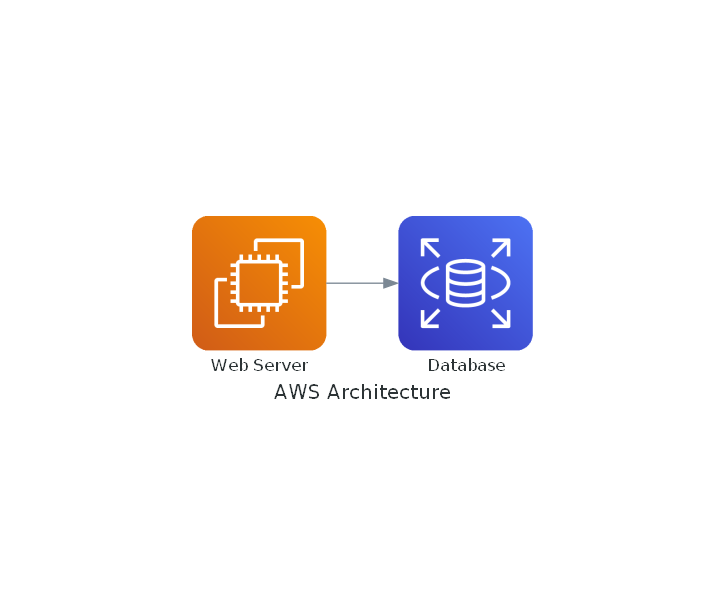

In [2]:
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS

with Diagram("AWS Architecture", show=False) as diagram:
    web_server = EC2("Web Server")
    database = RDS("Database")
    
    web_server >> database
diagram

### Generic and On-Premise

Estos componentes son útiles cuando desea representar tecnologías subyacentes que no están vinculadas a un proveedor de la nube específico o que se ejecutan en entornos locales (on-premise). Puede utilizar estos componentes para crear diagramas independientes de la nube.

Ejemplo:

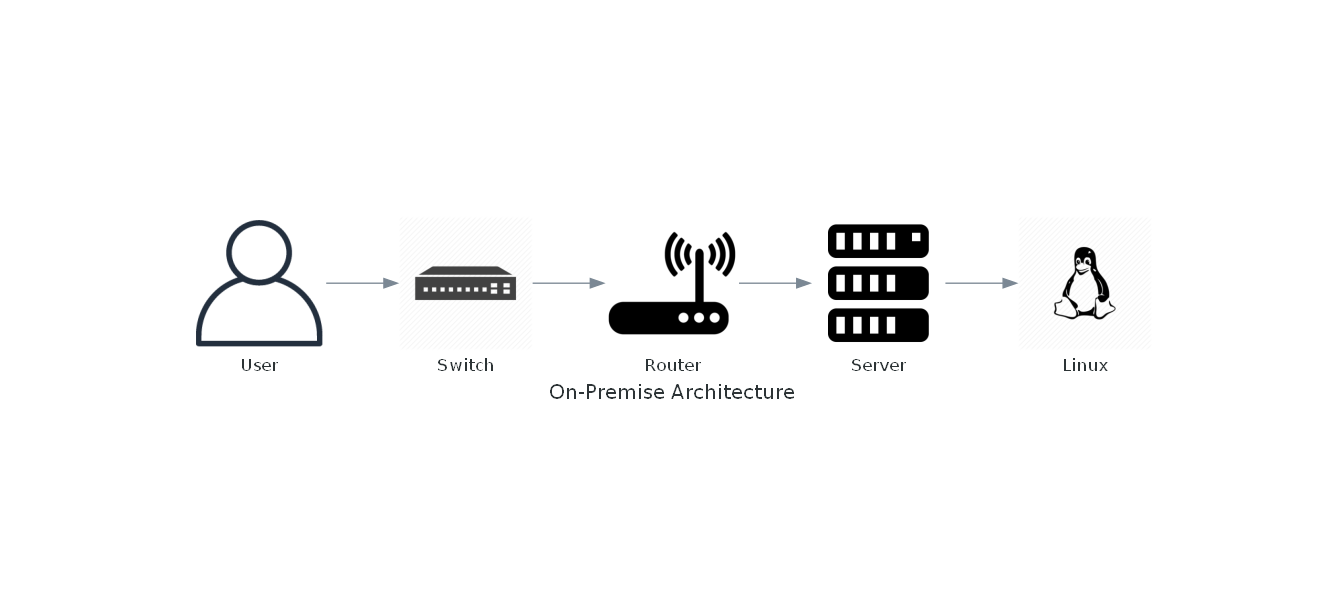

In [3]:
from diagrams import Diagram
from diagrams.generic.network import Switch, Router
from diagrams.onprem.client import User
from diagrams.onprem.compute import Server
from diagrams.generic.os import LinuxGeneral

with Diagram("On-Premise Architecture", show=False) as diagram:
    user = User("User")
    switch = Switch("Switch")
    router = Router("Router")
    server = Server("Server")
    linux = LinuxGeneral("Linux")

    user >> switch >> router >> server >> linux
diagram

### Frameworks

Estos componentes son útiles cuando desea representar componentes de sistemas relacionados con un lenguaje de programación o un marco de trabajo específico. Esto es útil para mostrar cómo se integran diferentes tecnologías en su sistema.

Ejemplo:

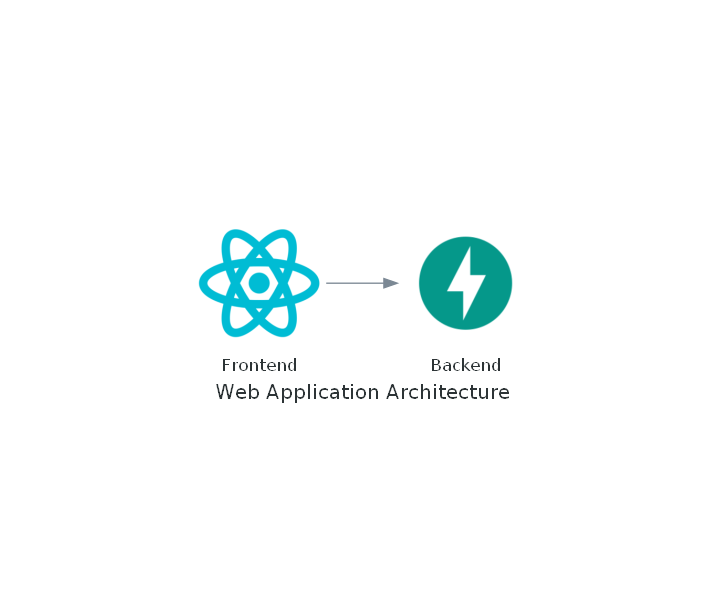

In [4]:
from diagrams.programming.framework import React
from diagrams.programming.framework import Fastapi

with Diagram("Web Application Architecture", show=False) as diagram:
    frontend = React("Frontend")
    backend = Fastapi("Backend")
    
    frontend >> backend
diagram

### SaaS

La biblioteca "diagrams" también proporciona componentes para representar Software como Servicio (SaaS) que se pueden utilizar en su arquitectura. Esto es útil cuando desea mostrar integraciones con servicios externos como Slack, Gmail, etc.

Ejemplo:

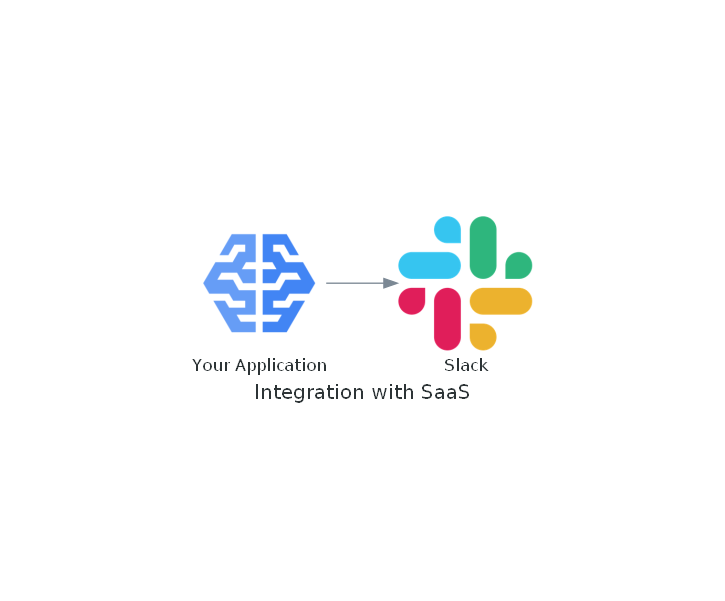

In [5]:
from diagrams.gcp.ml import AIPlatform
from diagrams.saas.chat import Slack

with Diagram("Integration with SaaS", show=False) as diagram:
    app = AIPlatform("Your Application")
    slack = Slack("Slack")
    
    app >> slack
diagram

## Más conceptos

### Nodes

``Node`` es un segundo objeto que representa un nodo o componente del sistema. ``Node`` es un concepto abstracto que representa un único objeto componente del sistema.

Un objeto ``Node`` consta de tres partes: proveedor, tipo de recurso y nombre. Es posible que ya haya visto cada parte en el ejemplo anterior.

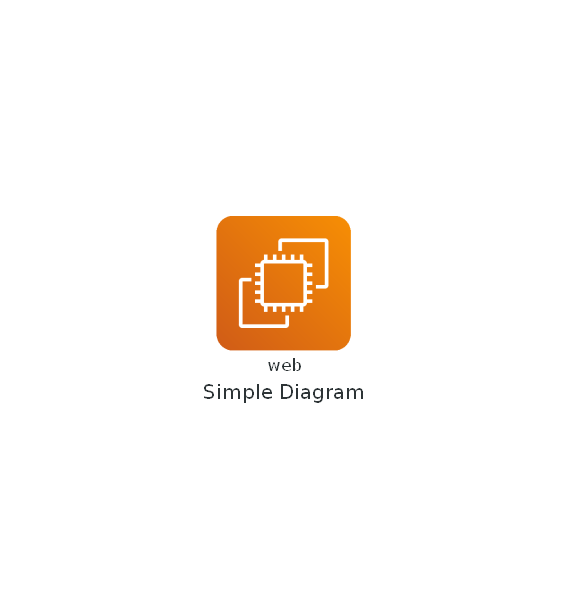

In [6]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram", show=False) as diagram:
    EC2("web")
diagram

En el ejemplo anterior,`EC2` es un nodo de tipo de recurso informático proporcionado por el proveedor de `AWS`.



#### Data Flow
Puede representar el flujo de datos conectando los nodos con estos operadores: 

* `>>`: Conecta los nodos de izquierda a derecha.
* `<<`: Conecta los nodos de derecha a izquierda.
* `-`: Conecta nodos en ninguna dirección. No dirigido.

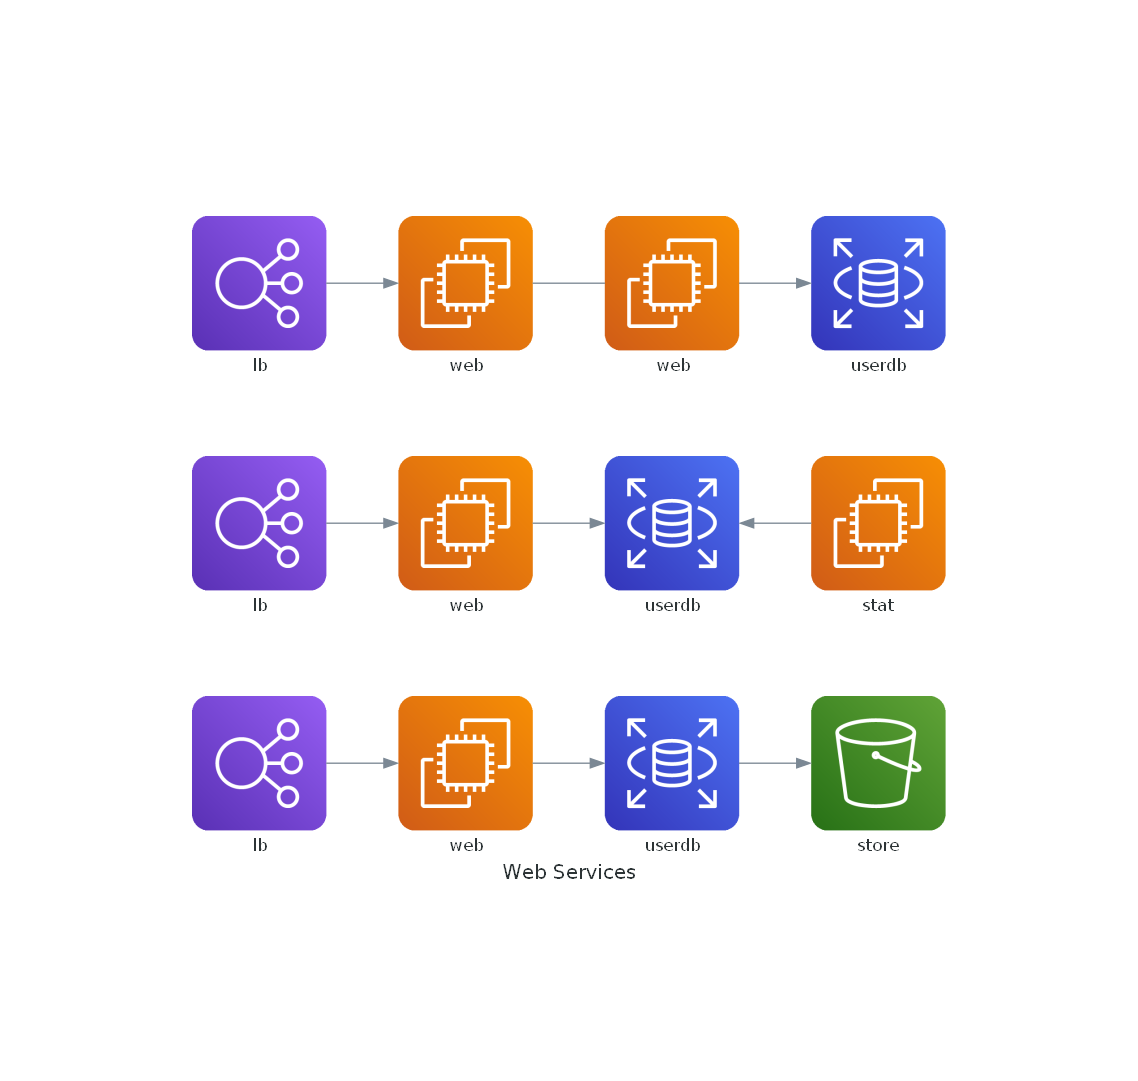

In [7]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.storage import S3

with Diagram("Web Services", show=False) as node:
    ELB("lb") >> EC2("web") >> RDS("userdb") >> S3("store")
    ELB("lb") >> EC2("web") >> RDS("userdb") << EC2("stat")
    (ELB("lb") >> EC2("web")) - EC2("web") >> RDS("userdb")
node

```warning
Tenga cuidado al usar `-` y cualquier operador de turno juntos, lo que podría causar resultados inesperados debido a la precedencia del operador.
```

```
El orden de los diagramas renderizados es el inverso del orden de declaración.
```

Puede cambiar la dirección del flujo de datos con el parámetro `direction`. El valor predeterminado es **LR**.


```
(TB, BT, LR y RL) están permitidos.

```

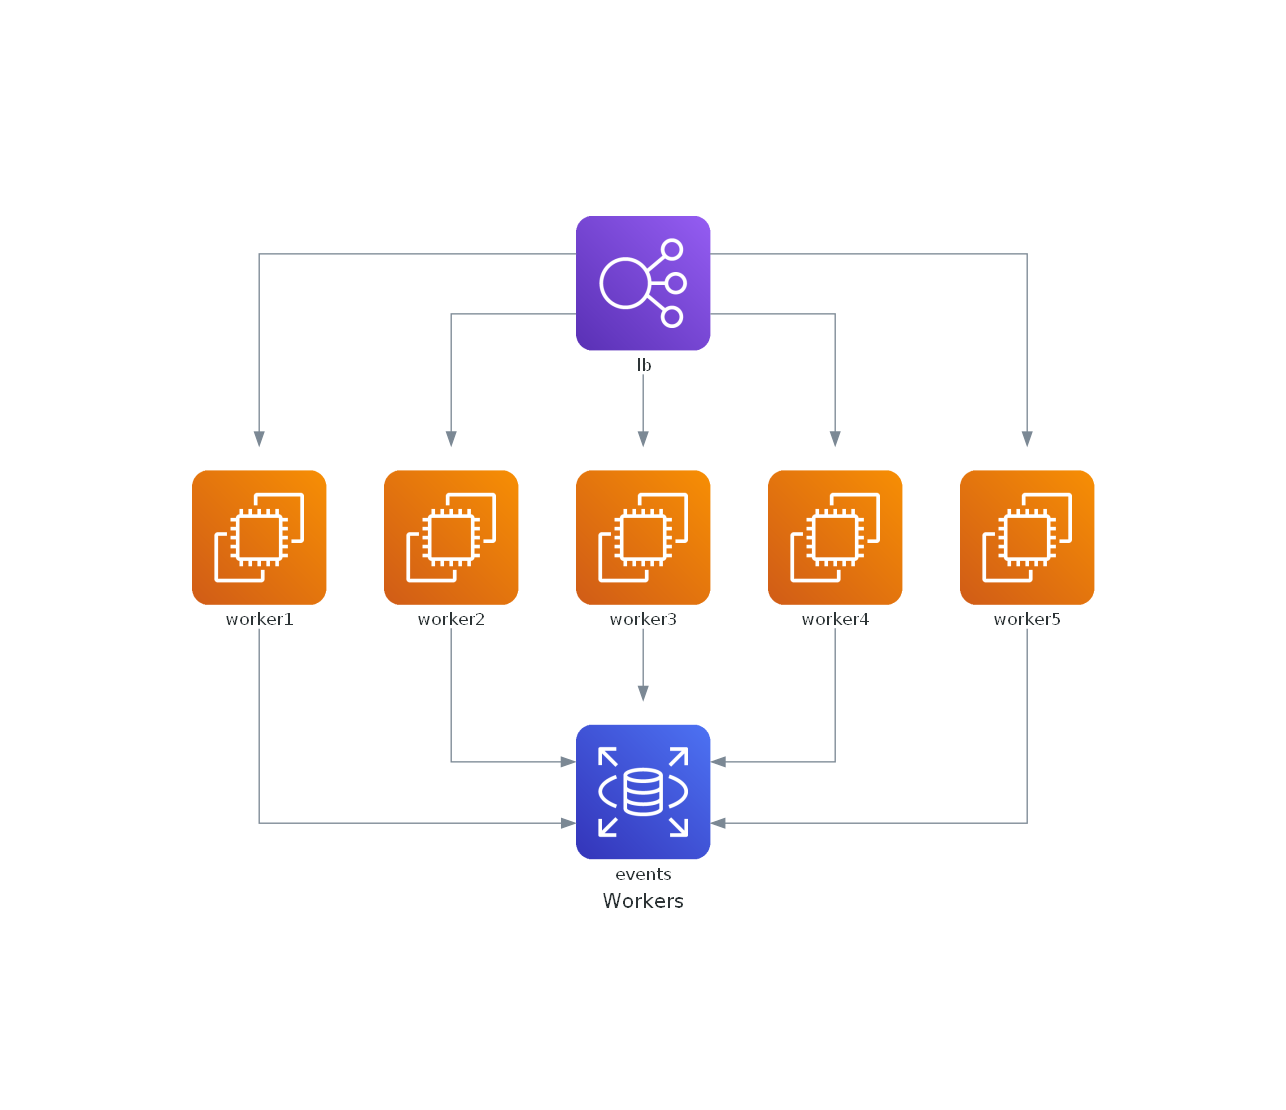

In [8]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Workers", show=False, direction="TB")as node:
    lb = ELB("lb")
    db = RDS("events")
    lb >> EC2("worker1") >> db
    lb >> EC2("worker2") >> db
    lb >> EC2("worker3") >> db
    lb >> EC2("worker4") >> db
    lb >> EC2("worker5") >> db
node

#### Group Data Flow
El ejemplo del `worker` anterior tiene demasiados flujos redundantes. En este caso, puede agrupar nodos en una lista para que todos los nodos estén conectados a otros nodos a la vez.

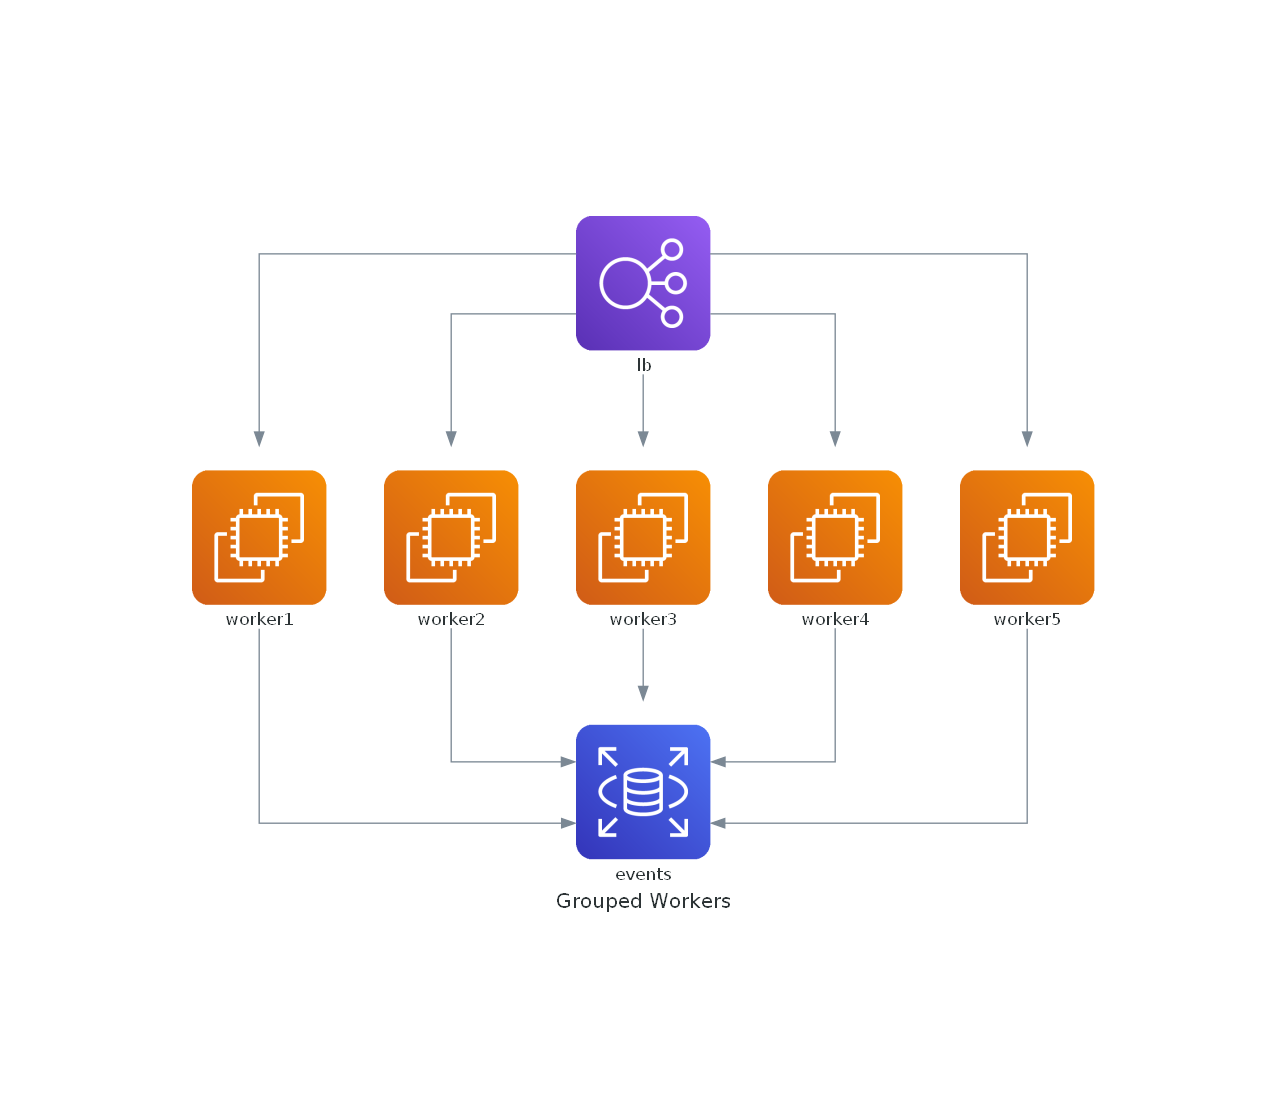

In [9]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Grouped Workers", show=False, direction="TB") as node:
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")

node

```warning
No puede conectar dos listas directamente porque las operaciones `shift/arithmetic` entre listas no están permitidas en Python.
```

### Clusters
`Cluster` le permite agrupar (o agrupar) los nodos en un grupo aislado. `Cluster` representa un contexto de clúster local.

Puede crear un contexto de clúster con la clase `Cluster`. Y también puede conectar los nodos de un clúster a otros nodos fuera de un clúster.

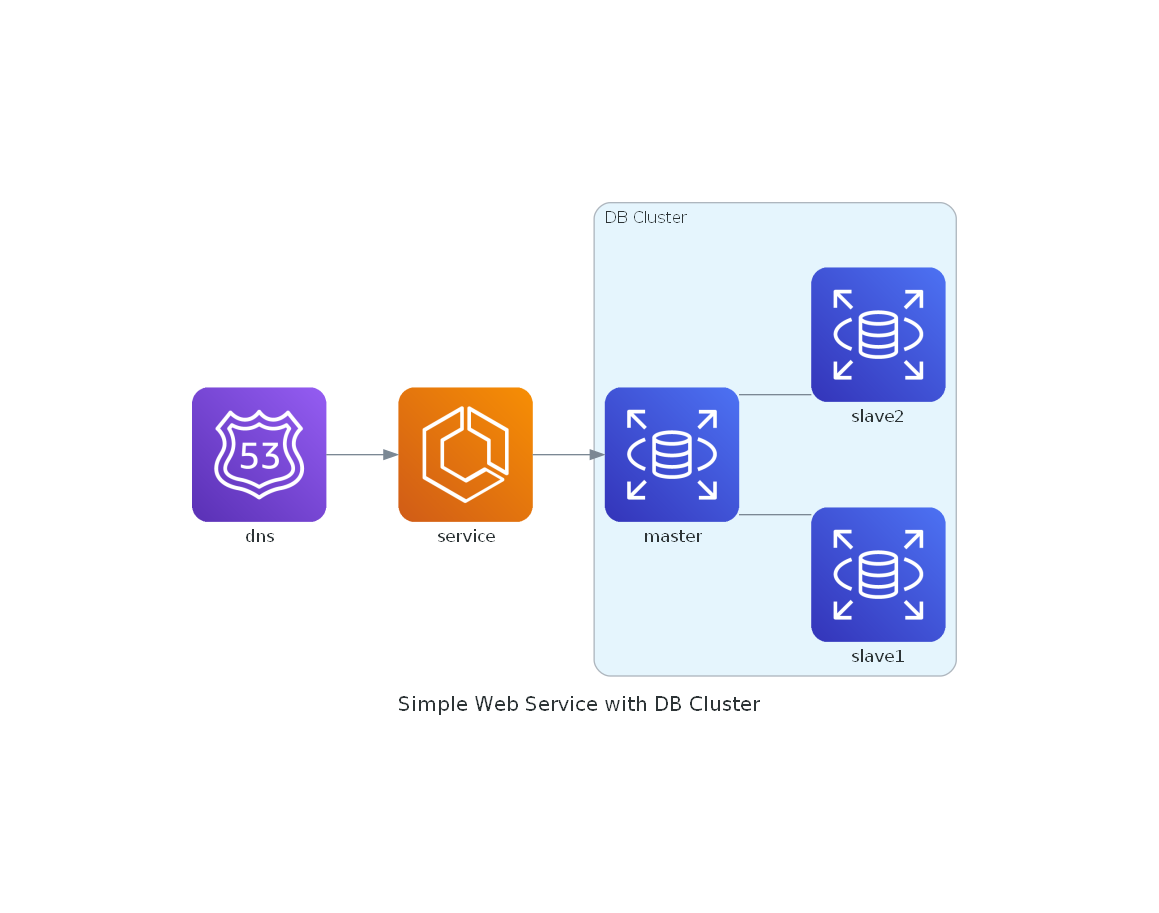

In [10]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import RDS
from diagrams.aws.network import Route53

with Diagram("Simple Web Service with DB Cluster", show=False) as cluster:
    dns = Route53("dns")
    web = ECS("service")

    with Cluster("DB Cluster"):
        db_master = RDS("master")
        db_master - [RDS("slave1"),
                     RDS("slave2")]

    dns >> web >> db_master
cluster

### Nested Clusters
También es posible la agrupación en clústeres anidados.

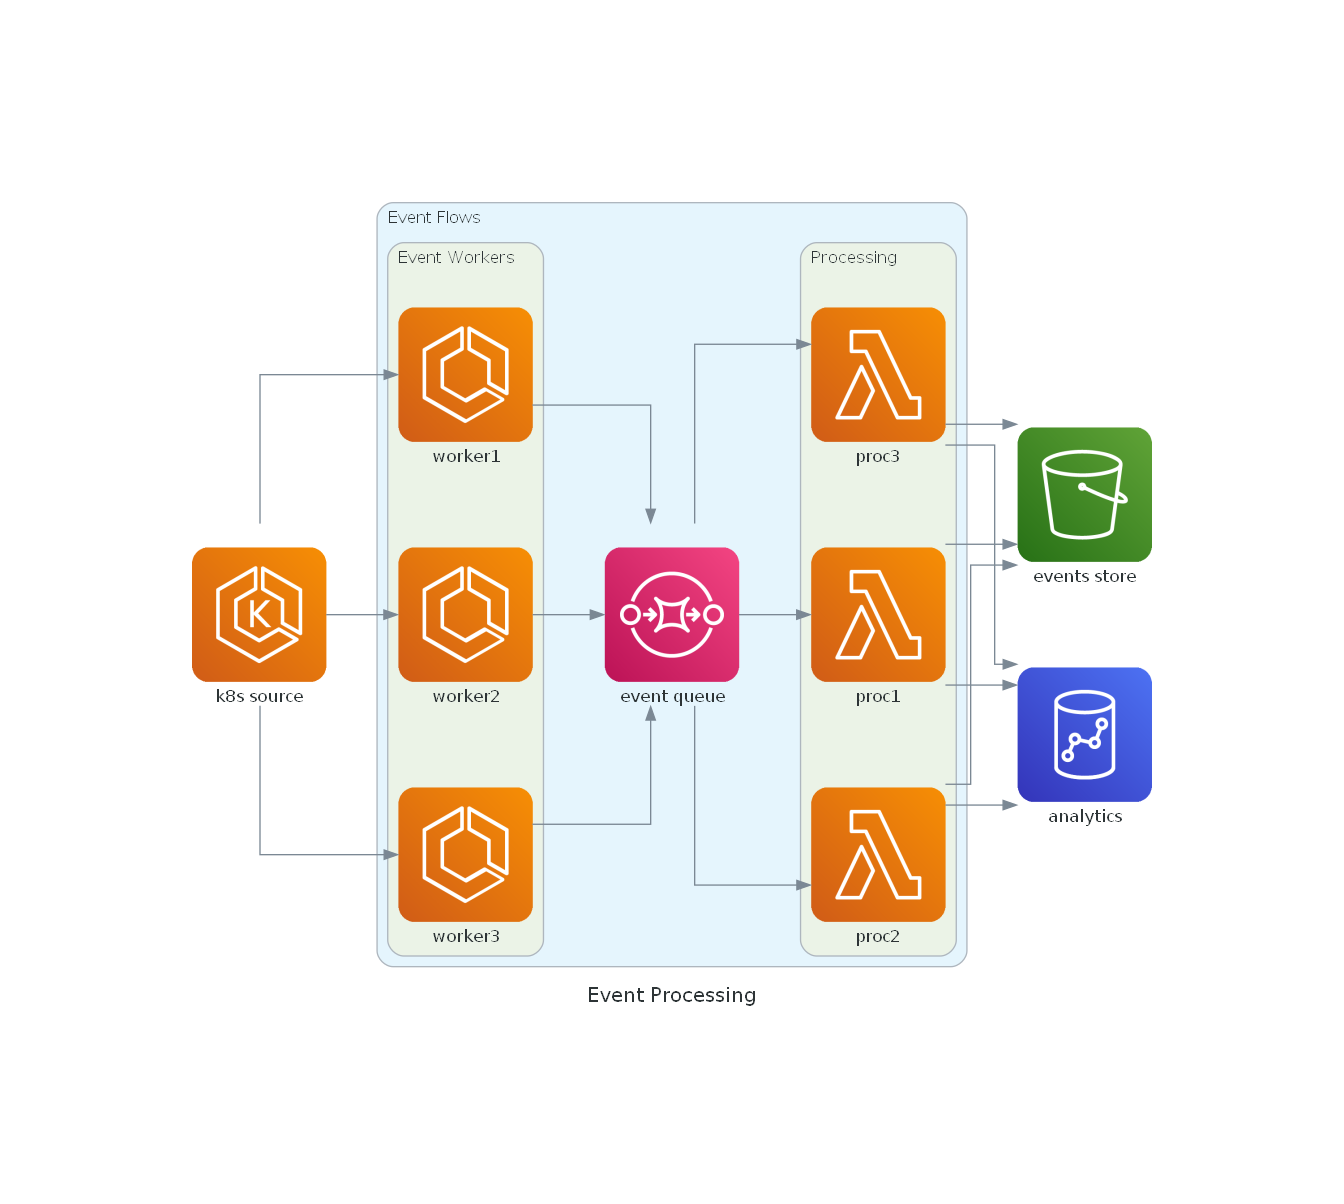

In [11]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False) as cluster:
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw
cluster

```
No hay límite de profundidad de anidación. Siéntase libre de crear clústeres anidados con la profundidad que desee.
```

### Edges
`Edge` representa un borde entre nodos. `Edge`  es un objeto que representa una conexión entre nodos con algunas propiedades adicionales.

Un objeto `Edge` contiene tres atributos: etiqueta, color y estilo que reflejan los atributos de borde de `graphviz` correspondientes.

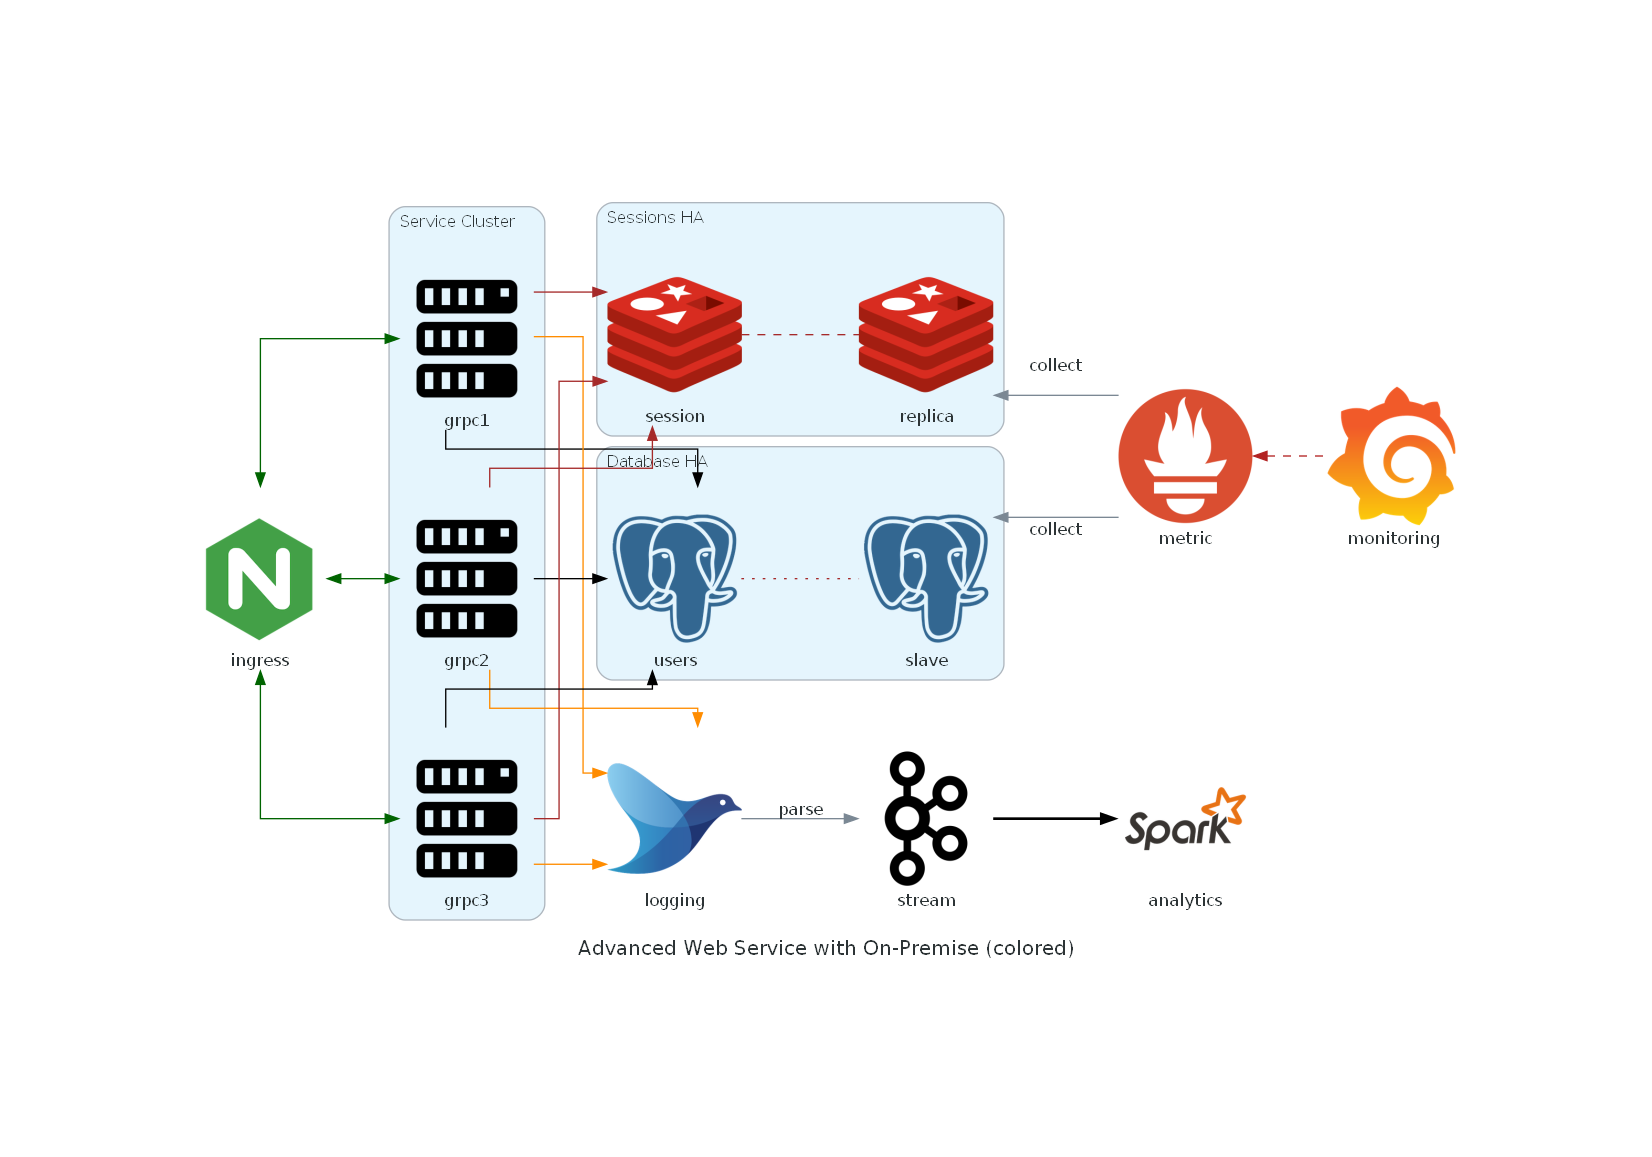

In [12]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram(name="Advanced Web Service with On-Premise (colored)", show=False) as edges:
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        master = Redis("session")
        master - Edge(color="brown", style="dashed") - Redis("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="brown") >> master

    with Cluster("Database HA"):
        master = PostgreSQL("users")
        master - Edge(color="brown", style="dotted") - PostgreSQL("slave") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="black") >> master

    aggregator = Fluentd("logging")
    aggregator >> Edge(label="parse") >> Kafka("stream") >> Edge(color="black", style="bold") >> Spark("analytics")

    ingress >> Edge(color="darkgreen") << grpcsvc >> Edge(color="darkorange") >> aggregator
edges

## Conclusión

Diagrams es una herramienta poderosa que facilita la creación de diagramas como código en Python. Te permite representar infraestructuras y arquitecturas de manera eficiente, lo que es útil para la documentación, la colaboración y la automatización. Al utilizar Diagrams, puedes mejorar la comprensión y la comunicación de tus diseños y proyectos.

## Referencias

- [Repositorio oficial de Diagrams en GitHub](https://github.com/mingrammer/diagrams)
- [Documentación oficial de Diagrams](https://diagrams.mingrammer.com/)
- [Ejemplos adicionales de Diagrams](https://diagrams.mingrammer.com/docs/getting-started/examples)
